### College of Computing and Informatics, Drexel University
### INFO 212: Data Science Programming I, Spring 2020
### Due: Wednesday, June 10, 2020
---

## Final Project Report

## Project Title: Kickstarter Project

## Student(s): Man Tik Li

#### Date: June 3, 2020
---

#### Abstract
---
*(Briefly summarize the project including the problem, data sets, and final findings.)* 

Most of the projects fomr Kickstater were unsucessful. People should invest them carefully.

### 1. Introduction
---
*(Introduce the project, describe the objectives, and present the results. This section will provide an overview of the entire project including the description of the data sets and the specific data analytics methods and techniques the team used for analyzing the data to address the problem. Highlight the key findings.)* 

---
Kickstarter is a platform that helps bring creative projects in the real world. Anyone can convert their idea into a project, but the project also requires funding to make it works. The creator will set the project's funding goal and deadline. Here's come to investors, if the project succeeds in reaching its funding goal, all investors would be a charge when the time expires.

### 2. Problem Definition
---
*(Define the problem that will be solved in this data analytics project. Where does the problem come from? Who would be benefited from the solutions presented in this project? Use formal languages and notations to define the problem as much as possible.)*

---
This project is to analyze the success rate and the type of successful projects on Kickstarter.

The problem was derived from my experience when using Kickstarter. Some of the projects were great, and you can get it at a lower price before launch. However, some creators use this platform to intend to scams its investors out of pockets.

Many projects on Kickstarter may look great. However, not all projects can survive at last. The stakeholder for this project can have a better sign when they are funding on Kickstarter. The data will tell the truth of how many projects can succeed or fail among all the projects.

### 3. Data Sources
---
*(Describe the origin of the data sources. What is the format of the original data? How to access the data?)*

---
The data sources came from Kaggle - https://www.kaggle.com/kemical/kickstarter-projects

The data came in the form of two CSV files with December, 2016 and January, 2018

To access the data, download the file, "kickstarter-projects/ks-projects-201801.csv" and read it into python. The ks-projects-201801.csv would be use in this project. The resulting dataframe is shown below.

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime
import calendar

In [168]:
df = pd.read_csv("ks-projects-201801.csv")
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [169]:
df.shape

(378661, 15)

In [170]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [171]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

---
In addition to displaying the downloaded dataframe

In [172]:
print("The size of the data provided has %d rows and %d columns." %(df.shape[0], df.shape[1]), "\n")

print("The following columns are present in the given data:")
for item in list(df):
    print(item)

The size of the data provided has 378661 rows and 15 columns. 

The following columns are present in the given data:
ID
name
category
main_category
currency
deadline
goal
launched
pledged
state
backers
country
usd pledged
usd_pledged_real
usd_goal_real


---
The following columns have different numbers of unique cell values present in the given data:

In [173]:
df.isnull().values.any()

True

In [174]:
df.duplicated().sum()

0

In [175]:
print(df.nunique())

ID                  378661
name                375764
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378089
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64


---
The following columns have different numbers of empty cell values present in the given data:

In [176]:
print(df.isnull().sum())

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


### 4. Acquiring and Loading Data
---
*(Present the code and methods for acquiring the data. Load the data into appropriate format for analysis. Explain the process and results.)*

In [177]:
stat_cols = ["main_category", "launched", "deadline", "backers", "state"]
print("The columns I am using:")
for i in stat_cols:
    print(i)

The columns I am using:
main_category
launched
deadline
backers
state


---
The dataframe in which most of the analysis will be donw on is shown below:

In [178]:
stats = df[stat_cols]
stats

,main_category,launched,deadline,backers,state
0,Publishing,2015-08-11 12:12:28,2015-10-09,0,failed
1,Film & Video,2017-09-02 04:43:57,2017-11-01,15,failed
2,Film & Video,2013-01-12 00:20:50,2013-02-26,3,failed
3,Music,2012-03-17 03:24:11,2012-04-16,1,failed
4,Film & Video,2015-07-04 08:35:03,2015-08-29,14,canceled
...,...,...,...,...,...
378656,Film & Video,2014-09-17 02:35:30,2014-10-17,1,canceled
378657,Film & Video,2011-06-22 03:35:14,2011-07-19,5,failed
378658,Film & Video,2010-07-01 19:40:30,2010-08-16,1,failed
378659,Technology,2016-01-13 18:13:53,2016-02-13,6,failed


### 5. Wrangling and Cleansing Data
---
*(Cleanse the data, fill up missing data, and wrangle the data to prepare for analysis. Explain the process and the results.)*

---
In the first step in exploration, we will try to find is the relationships between the project's type and prject state. In other words, we will see if there is any kinds of connections between those two attributes.

In [179]:
df["state"].isnull().sum()

0

In [180]:
df["main_category"].isnull().sum()

0

In [181]:
# Convert to datatime
df["launched"] = pd.to_datetime(df["launched"], format='%Y-%m-%d').dt.date
df["deadline"] = pd.to_datetime(df["deadline"], format='%Y-%m-%d').dt.date
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13,200.0,failed,6,US,200.0,200.0,15000.00


In [182]:
# Replace blank on live and underfined for state value
df["state"] = df["state"].replace("live", )
df["state"] = df["state"].replace("undefined", )

# Drop all empty values
df["state"] = df["state"].dropna()
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13,200.0,failed,6,US,200.0,200.0,15000.00


In [183]:
print(df["state"])

0           failed
1           failed
2           failed
3           failed
4         canceled
            ...   
378656    canceled
378657      failed
378658      failed
378659      failed
378660      failed
Name: state, Length: 378661, dtype: object


### 6. Exploring and Visualizing Data
---
*(Explore the data by analyzing its statistics and visualizing the values of features and correlations between different features. Explain the process and the results.)*

Text(0, 0.5, 'Number of Project')

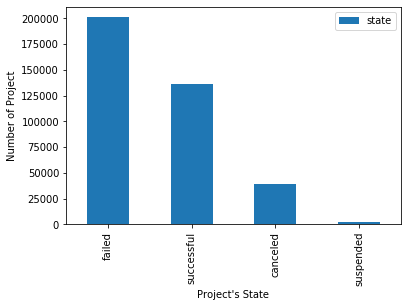

In [203]:
# Plotting
df.state.value_counts().plot.bar()
plt.legend()
plt.xlabel("Project's State")
plt.ylabel('Number of Project')

Text(0, 0.5, 'Number of Project')

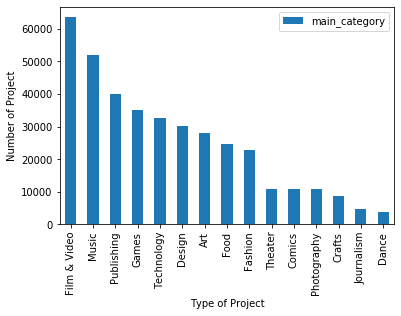

In [204]:
# Plotting for project type

df.main_category.value_counts().plot.bar()
plt.legend()
plt.xlabel("Type of Project")
plt.ylabel('Number of Project')

### 7. Analyzing Data
---
*(Analyze the data by applying various data analytics methods. The analysis should be guided by the problem defined earlier. Explain the process and results.)*

In [202]:
state = pd.DataFrame({'ProjectID': df.ID, 'Project State': df.state})
state.head(20)

,ProjectID,Project State
0,1000002330,failed
1,1000003930,failed
2,1000004038,failed
3,1000007540,failed
4,1000011046,canceled
5,1000014025,successful
6,1000023410,successful
7,1000030581,failed
8,1000034518,canceled
9,100004195,canceled


### 8. Reporting Results
---
*(Use appropriate methods to present the results including tables, plots, and bullet points. Explain how the analysis process and results solve the problem.)*

Text(0, 0.5, 'Number of Project')

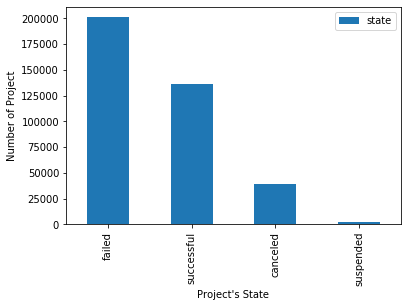

In [206]:
# Plotting
df.state.value_counts().plot.bar()
plt.legend()
plt.xlabel("Project's State")
plt.ylabel('Number of Project')

According to the plot chart, we can see that there's 200000 projects were failed, less than 50000 of the projects were being canceled, and less than 25000 being supspended.

### 9. Conclusion
---
*(Briefly describe what you have done and what you discovered. Discuss any shortcomings of the process and results. Propose future work. **Finally, discuss the lessons learned from doing the project**.)*

Overall, I found out that most of the projects failed, and it's challenging to succeed. The lessons I learned from doing this project were I should invest Kickstarter projects wisely or never invest in it.

### 10. References

---
(*Use the following requirements for writing your reports. DO NOT DELETE THE CELLS BELLOW*)

# Project Requirements

This final project examines the level of knowledge the students have learned from the course. The following course outcomes will be checked against the content of the report:

Upon successful completion of this course, a student will be able to:
* Describe the main steps and key issues in the process of acquiring and preparing data for data analytics.
* Set up data analysis environment by integrating commonly used practical tools and programming packages.   
* Explain different types of data storages and formats and apply appropriate tools for extracting and transforming data.
* Create interactive and programming code for cleansing, wrangling, reshaping, visualizing and analyzing various data sets. 
* Explain the concepts of aggregation and grouping, and apply tools and write programs to aggregate and group data.

** Marking will be foucsed on both presentation and content.** 

## Written Presentation Requirements
The report will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as its contents. Please make sure that the text of your report is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

## Technical Content:
* Is the problem well defined and described thoroughly?
* Is the size and complexity of the data set used in this project comparable to that of the example data sets used in the lectures and assignments?
* Did the report describe the charactriatics of the data?
* Did the report describe the goals of the data analysis?
* Did the analysis use plotting methods for visualization? Does the visualization convey meaningful messages?
* Did the analysis use wrangling, cleaning, and preparation methods? Does the work on wrangling, cleaning, and preparation demonstrate the student's knowlegde about these topics covered in this course?
* Did the analysis conduct aggretation and create descriptive statistics? Does the work on aggregation and descriptive statistics demonstrate the student's knowlegde about these topics covered in this course?
* Did the report include all related references?
* Only those projects that exceed the sophistication of the final data analysis examples and assignments can be marked as the highest level of grade.
* Overall, what is the rating of this project?